In [1]:
!gpustat

user                 Sat Jun 28 02:09:15 2025  535.183.01
[0] NVIDIA RTX A5000 | 36'C,   0 % |  7618 / 24564 MB | rohan_kirti(7288M) gdm(4M)
[1] NVIDIA RTX A5000 | 37'C,   0 % |  6422 / 24564 MB | rohan_kirti(6092M) gdm(4M)


 Dataset loaded successfully!
Number of rows: 167020
Number of columns: 217

 Data types and non-null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167020 entries, 0 to 167019
Columns: 217 entries, UID to X215
dtypes: bool(1), float64(89), int64(97), object(30)
memory usage: 275.4+ MB
None

 First few rows of the dataset:
            UID              X0      X1          X2          X3          X4  \
0  1003904-3746  14 month lease  1103.0  2015-01-08  2016-02-28  2015-07-30   
1  1003904-3751  12 month lease  1136.0  2015-01-24  2016-01-17         NaN   
2  1003904-3756  12 month lease  1382.0  2015-02-20  2016-02-21  2016-02-21   
3  1003904-3759  14 month lease  2417.0  2015-02-06  2016-04-03  2016-04-04   
4  1003904-3766  12 month lease  1405.0  2015-01-10  2016-01-03         NaN   

           X5          X6          X7          X8  ...      X206      X207  \
0  2015-01-08  2015-01-08  2015-07-30  2015-07-01  ... -1.000000 -1.000000   
1  2003-09-11  2003-09-11        

/tmp/ipykernel_1151755/3355697015.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_col, data=df, palette='viridis')


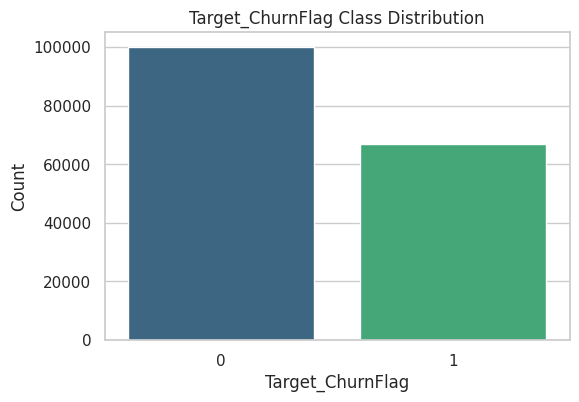

In [2]:
# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look better
sns.set(style='whitegrid')

# Load the dataset
file_path = "deepq_ai_assignment1_data 2.csv"
df = pd.read_csv(file_path)

print(" Dataset loaded successfully!")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}\n")

print(" Data types and non-null values:")
print(df.info())

# Peek at the first few rows
print("\n First few rows of the dataset:")
print(df.head())

# Check target distribution
target_col = 'Target_ChurnFlag'
target_counts = df[target_col].value_counts()
target_pct = df[target_col].value_counts(normalize=True) * 100

print("\n Target_ChurnFlag distribution:")
for label, count in target_counts.items():
    print(f"Class {label}: {count} rows ({target_pct[label]:.2f}%)")

#Check for missing values
total_nulls = df.isnull().sum().sum()
print(f"\n Total missing values in dataset: {total_nulls}")

# === Check basic stats of features ===
# Exclude UID and target column
feature_cols = [col for col in df.columns if col.startswith('X')]
print("\n Summary statistics for first few features:")
print(df[feature_cols[:5]].describe())

#Plot the target distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=target_col, data=df, palette='viridis')
plt.title('Target_ChurnFlag Class Distribution')
plt.xlabel('Target_ChurnFlag')
plt.ylabel('Count')
plt.show()


In [3]:
# Identify columns with missing data
missing_per_col = df.isnull().sum().sort_values(ascending=False)

print("Columns with the most missing values:")
print(missing_per_col.head(10))

# Remove columns with >50% missing values
threshold = 0.5 * df.shape[0]
cols_to_drop = missing_per_col[missing_per_col > threshold].index.tolist()

print(f"\nDropping {len(cols_to_drop)} columns with >50% missing values.")
df_clean = df.drop(columns=cols_to_drop)

# Show remaining shape
print(f"New shape after dropping columns: {df_clean.shape}")

# Check object columns
obj_cols = df_clean.select_dtypes(include='object').columns.tolist()
print("\nRemaining object columns:")
print(obj_cols)

# Check a few unique values of X0 (lease type)
if 'X0' in obj_cols:
    print("\nX0 sample unique values:")
    print(df_clean['X0'].unique())

# Check date-type columns (if any obvious ones remain)
print("\nExample values of remaining object columns:")
for col in obj_cols[:5]:
    print(f"{col}: {df_clean[col].unique()[:3]}")


Columns with the most missing values:
X11     167020
X9      158340
X100    137026
X99     123888
X108    107416
X8       95579
X7       92761
X4       84400
X16      66919
X85      37511
dtype: int64

Dropping 8 columns with >50% missing values.
New shape after dropping columns: (167020, 209)

Remaining object columns:
['UID', 'X0', 'X2', 'X3', 'X5', 'X6', 'X16', 'X18', 'X30', 'X31', 'X149', 'X150', 'X151', 'X152', 'X154', 'X155', 'X156', 'X157', 'X158', 'X164', 'X165', 'X169', 'X170']

X0 sample unique values:
['14 month lease' '12 month lease' '13 month lease' '11 month lease'
 '3 month lease' '16 month lease' '15 month lease' '6 month lease'
 '4 month lease' '10 month lease' '7 month lease' '24 month'
 '8 month lease' '9 month lease' '18 month lease' '17 month lease'
 '14 month' '14  month lease' '1 month lease' '15 monh lease' '3 month'
 '14month lease' '2 month lease' '5 month lease' '12 Month Lease'
 '11 Month Lease' '15 Month Lease' '13 Month Lease' '10 Month Lease'
 '3 Month L

In [4]:
# Drop UID - not useful for modeling
df_clean = df_clean.drop(columns=['UID'])

#Clean X0 
def clean_lease_type(value):
    if pd.isnull(value):
        return 'unknown'
    value = str(value).lower().replace('lease', '').replace('month', '').replace('term', '')
    value = value.replace('months', '').replace('monh', '').replace('  ', ' ').strip()
    return value

df_clean['X0_clean'] = df_clean['X0'].apply(clean_lease_type)

print("\nUnique cleaned lease types:")
print(df_clean['X0_clean'].unique())

#Process date columns (example X2 and X3 as start and end dates)
# Convert to datetime
df_clean['X2_dt'] = pd.to_datetime(df_clean['X2'], errors='coerce')
df_clean['X3_dt'] = pd.to_datetime(df_clean['X3'], errors='coerce')

# Compute duration in days
df_clean['duration_X2_X3'] = (df_clean['X3_dt'] - df_clean['X2_dt']).dt.days

# Preview duration
print("\nSample duration (X2 to X3):")
print(df_clean[['X2', 'X3', 'duration_X2_X3']].head())

# Remove original X0, X2, X3 (we now have engineered features)
df_clean = df_clean.drop(columns=['X0', 'X2', 'X3'])



Unique cleaned lease types:
['14' '12' '13' '11' '3' '16' '15' '6' '4' '10' '7' '24' '8' '9' '18' '17'
 '1' '2' '5' '13 mont' '13 s' '14 s' '6 s' '15 s' '3 s']

Sample duration (X2 to X3):
           X2          X3  duration_X2_X3
0  2015-01-08  2016-02-28             416
1  2015-01-24  2016-01-17             358
2  2015-02-20  2016-02-21             366
3  2015-02-06  2016-04-03             422
4  2015-01-10  2016-01-03             358


In [5]:
# Fixing leftover messy lease types
def finalize_lease(value):
    try:
        return int(value.split()[0])
    except:
        return np.nan  # if it can't be converted

df_clean['X0_clean'] = df_clean['X0_clean'].apply(finalize_lease)

# Checking result
print("\nLease type after final numeric conversion:")
print(df_clean['X0_clean'].unique())

# If any NaNs, fill with a default or median
if df_clean['X0_clean'].isnull().sum() > 0:
    median_lease = df_clean['X0_clean'].median()
    df_clean['X0_clean'] = df_clean['X0_clean'].fillna(median_lease)

# Drop any other object columns (or encode if we want)
remaining_obj = df_clean.select_dtypes(include='object').columns.tolist()
print("\nRemaining object columns to handle:")
print(remaining_obj)

# Drop remaining raw date columns (we have duration)
date_cols_to_drop = [col for col in remaining_obj if 'dt' not in col]
df_clean = df_clean.drop(columns=date_cols_to_drop)

print(f"\nShape after dropping raw object columns: {df_clean.shape}")



Lease type after final numeric conversion:
[14 12 13 11  3 16 15  6  4 10  7 24  8  9 18 17  1  2  5]

Remaining object columns to handle:
['X5', 'X6', 'X16', 'X18', 'X30', 'X31', 'X149', 'X150', 'X151', 'X152', 'X154', 'X155', 'X156', 'X157', 'X158', 'X164', 'X165', 'X169', 'X170']

Shape after dropping raw object columns: (167020, 190)


In [6]:
# Convert date columns to datetime
date_cols = ['X5', 'X6', 'X16', 'X18', 'X30', 'X31']
for col in date_cols:
    df_clean[col + '_dt'] = pd.to_datetime(df_clean[col], errors='coerce')

# Example: Calculate age between X5 and X6
df_clean['duration_X5_X6'] = (df_clean['X6_dt'] - df_clean['X5_dt']).dt.days

# Drop original date columns
df_clean = df_clean.drop(columns=date_cols)

# Drop remaining object columns that are likely IDs or too messy
other_obj = df_clean.select_dtypes(include='object').columns.tolist()
df_clean = df_clean.drop(columns=other_obj)

print(f"\nShape after cleaning date and object columns: {df_clean.shape}")

# Check final columns
print("\nSample columns now:")
print(df_clean.columns[:10].tolist())


KeyError: 'X5'

In [7]:
# Printing remaining object columns to see what we actually have now
remaining_obj_cols = df_clean.select_dtypes(include='object').columns.tolist()

print("Remaining object columns:")
print(remaining_obj_cols)

#print a few rows of these
print("\nSample values from remaining object columns:")
print(df_clean[remaining_obj_cols].head())


✅ Remaining object columns:
[]

✅ Sample values from remaining object columns:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [8]:
# Check for NaN values
nan_summary = df_clean.isnull().sum()
nan_cols = nan_summary[nan_summary > 0]

print("Columns with missing values:")
print(nan_cols)

# Option 1: Impute with median for now (simple, clean, LightGBM-friendly)
for col in nan_cols.index:
    median_val = df_clean[col].median()
    df_clean[col].fillna(median_val, inplace=True)

# Final check
print("\nAny missing values left?")
print(df_clean.isnull().sum().sum())

# Show final shape
print(f"\nFinal data shape ready for modeling: {df_clean.shape}")


Columns with missing values:
X85    37511
dtype: int64

Any missing values left?
0

Final data shape ready for modeling: (167020, 190)


/tmp/ipykernel_1151755/3376392594.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(median_val, inplace=True)


In [13]:
# Identify datetime columns
datetime_cols = df_clean.select_dtypes(include=['datetime64']).columns.tolist()
print("Datetime columns to drop:", datetime_cols)

# Drop them
df_clean = df_clean.drop(columns=datetime_cols)

# Check final dtypes
print("\nDtypes after dropping datetime columns:")
print(df_clean.dtypes.value_counts())


Datetime columns to drop: ['X2_dt', 'X3_dt']

Dtypes after dropping datetime columns:
int64      99
float64    88
bool        1
Name: count, dtype: int64


Train shape: (133616, 187), Test shape: (33404, 187)

Test ROC-AUC: 0.7347

Confusion Matrix:
[[16621  3399]
 [ 7137  6247]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.83      0.76     20020
           1       0.65      0.47      0.54     13384

    accuracy                           0.68     33404
   macro avg       0.67      0.65      0.65     33404
weighted avg       0.68      0.68      0.67     33404



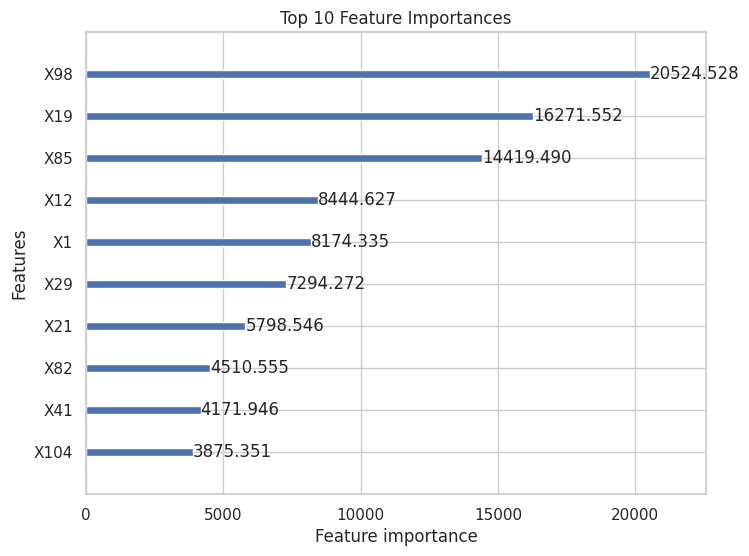

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
import lightgbm as lgb
import matplotlib.pyplot as plt

# Split data
target = 'Target_ChurnFlag'
X = df_clean.drop(columns=[target])
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

model = lgb.LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    random_state=42,
    n_estimators=300,
    verbosity=-1
)

model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='auc'
)

# Predict probas
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Metrics
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"\nTest ROC-AUC: {auc_score:.4f}")

y_pred_label = (y_pred_prob >= 0.5).astype(int)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_label))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_label))

# Feature importance
lgb.plot_importance(model, max_num_features=10, importance_type='gain', figsize=(8,6))
plt.title("Top 10 Feature Importances")
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# LightGBM classifier
model = lgb.LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    random_state=42,
    n_estimators=500,
    class_weight='balanced'  # handle imbalance
)

# Hyperparameter space
param_grid = {
    'num_leaves': [31, 50, 70],
    'max_depth': [ -1, 10, 20, 30],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_child_samples': [20, 50, 100],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

# Randomized search
search = RandomizedSearchCV(
    model,
    param_distributions=param_grid,
    n_iter=20,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

search.fit(X_train, y_train)

print(f"Best params: {search.best_params_}")
print(f"Best CV ROC-AUC: {search.best_score_:.4f}")

# Evaluate on test set
best_model = search.best_estimator_
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"Test ROC-AUC: {roc_auc:.4f}")

# Tune threshold for recall
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot precision-recall curve
import matplotlib.pyplot as plt
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.title('Precision-Recall vs Threshold')
plt.show()

# Pick threshold that gives higher recall (you decide trade-off!)
best_thresh = thresholds[recalls[:-1] >= 0.6][0] if any(recalls[:-1] >= 0.6) else 0.5
print(f"Chosen threshold: {best_thresh:.2f}")

y_pred_label = (y_pred_prob >= best_thresh).astype(int)

print(confusion_matrix(y_test, y_pred_label))
print(classification_report(y_test, y_pred_label))


Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [16]:
import joblib
joblib.dump(model, 'lgbm_churn_model.pkl')


['lgbm_churn_model.pkl']

In [20]:
# Assuming X_train, y_train already prepared
model = lgb.LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    random_state=42,
    n_estimators=300,
    class_weight='balanced'
)

model.fit(X_train, y_train)

# saving after import
import joblib
joblib.dump(model, 'lgbm_churn_model.pkl')


['lgbm_churn_model.pkl']

In [21]:
import joblib

model = joblib.load('lgbm_churn_model.pkl')

print(type(model))
print(hasattr(model, 'predict_proba'))  # should be True
print(model.feature_name_)              # should list feature names


<class 'lightgbm.sklearn.LGBMClassifier'>
True
['X1', 'X10', 'X12', 'X13', 'X14', 'X15', 'X17', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X29', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X121', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144', 'X145', 'X146', 'X147